# Código para extraer las palabras más utilizadas
En este trozo de código se desarrolla como crear una gráfica que lea del csv creado mediante los datos obtenidos de la API. Unicamnete se muestran las 15 palabras más usadas como máximo.

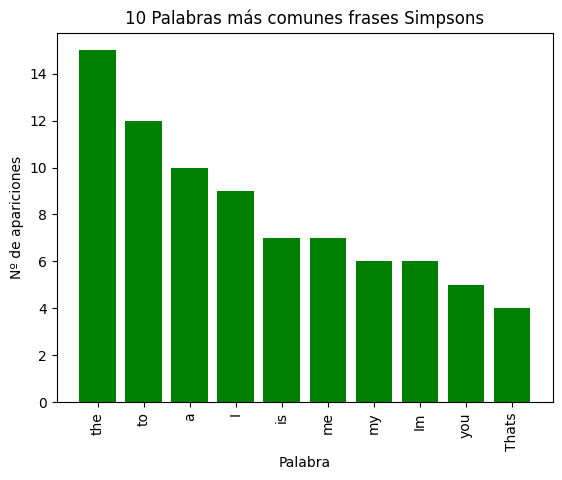

None

In [3]:
import pandas as pd
import os
from matplotlib import pyplot as plt
from IPython import display

#Tamaño del csv que se actualiza cada vez que empezamos el bucle
totalSize = 0 
# Numero de palabras que se van a mostrar en la gráfica
palabrasMostar = 15 

# Creamos un bucle para que cuando se detecten cambios se actualice
while True:
    # El try lo ponemos para cuando paremos la celda no salga ningún error
    try:
        # Comprobamos que el csv existe y si ha cambiado de tamaño desde la última vez
        if os.path.isfile('Personajes/Contador.csv') != 0 and totalSize != os.stat('Personajes/Contador.csv').st_size:
            # Actualizamos la variable del tamaño
            totalSize = os.stat('Personajes/Contador.csv').st_size

            #Leemos el csv y creamos el dataframe
            data = pd.read_csv('Personajes/Contador.csv')
            df = pd.DataFrame(data)

            # Ordenamos la columna 'Numero' de mayor a menor
            dfSorted = df.sort_values(by='Numero', ascending=False)
            
            X = list(dfSorted.iloc[:palabrasMostar, 0])
            Y = list(dfSorted.iloc[:palabrasMostar, 1])
            
            # Ponemos título a la gráfica
            if len(Y) < palabrasMostar:
                plt.title(f"Las {len(Y)} palabras más comunes son:") 
            else:
                plt.title(f"Las {len(Y)} palabras más comunes son:")
                
            plt.xlabel("Palabras")
            plt.ylabel("Nº de apariciones")

            #Estilos de la gráfica
            plt.bar(X, Y, color='g')
            plt.xticks(rotation=90)
            #Actualizaciones de la gráfica
            display.clear_output(wait=True)
            display.display(plt.show(block=False))
            
    
    # Exception to stop cell when stop button is pressed
    except KeyboardInterrupt:
        break     


# Código para extraer todas las carpetas de los personajes encontrados

(No está terminado)


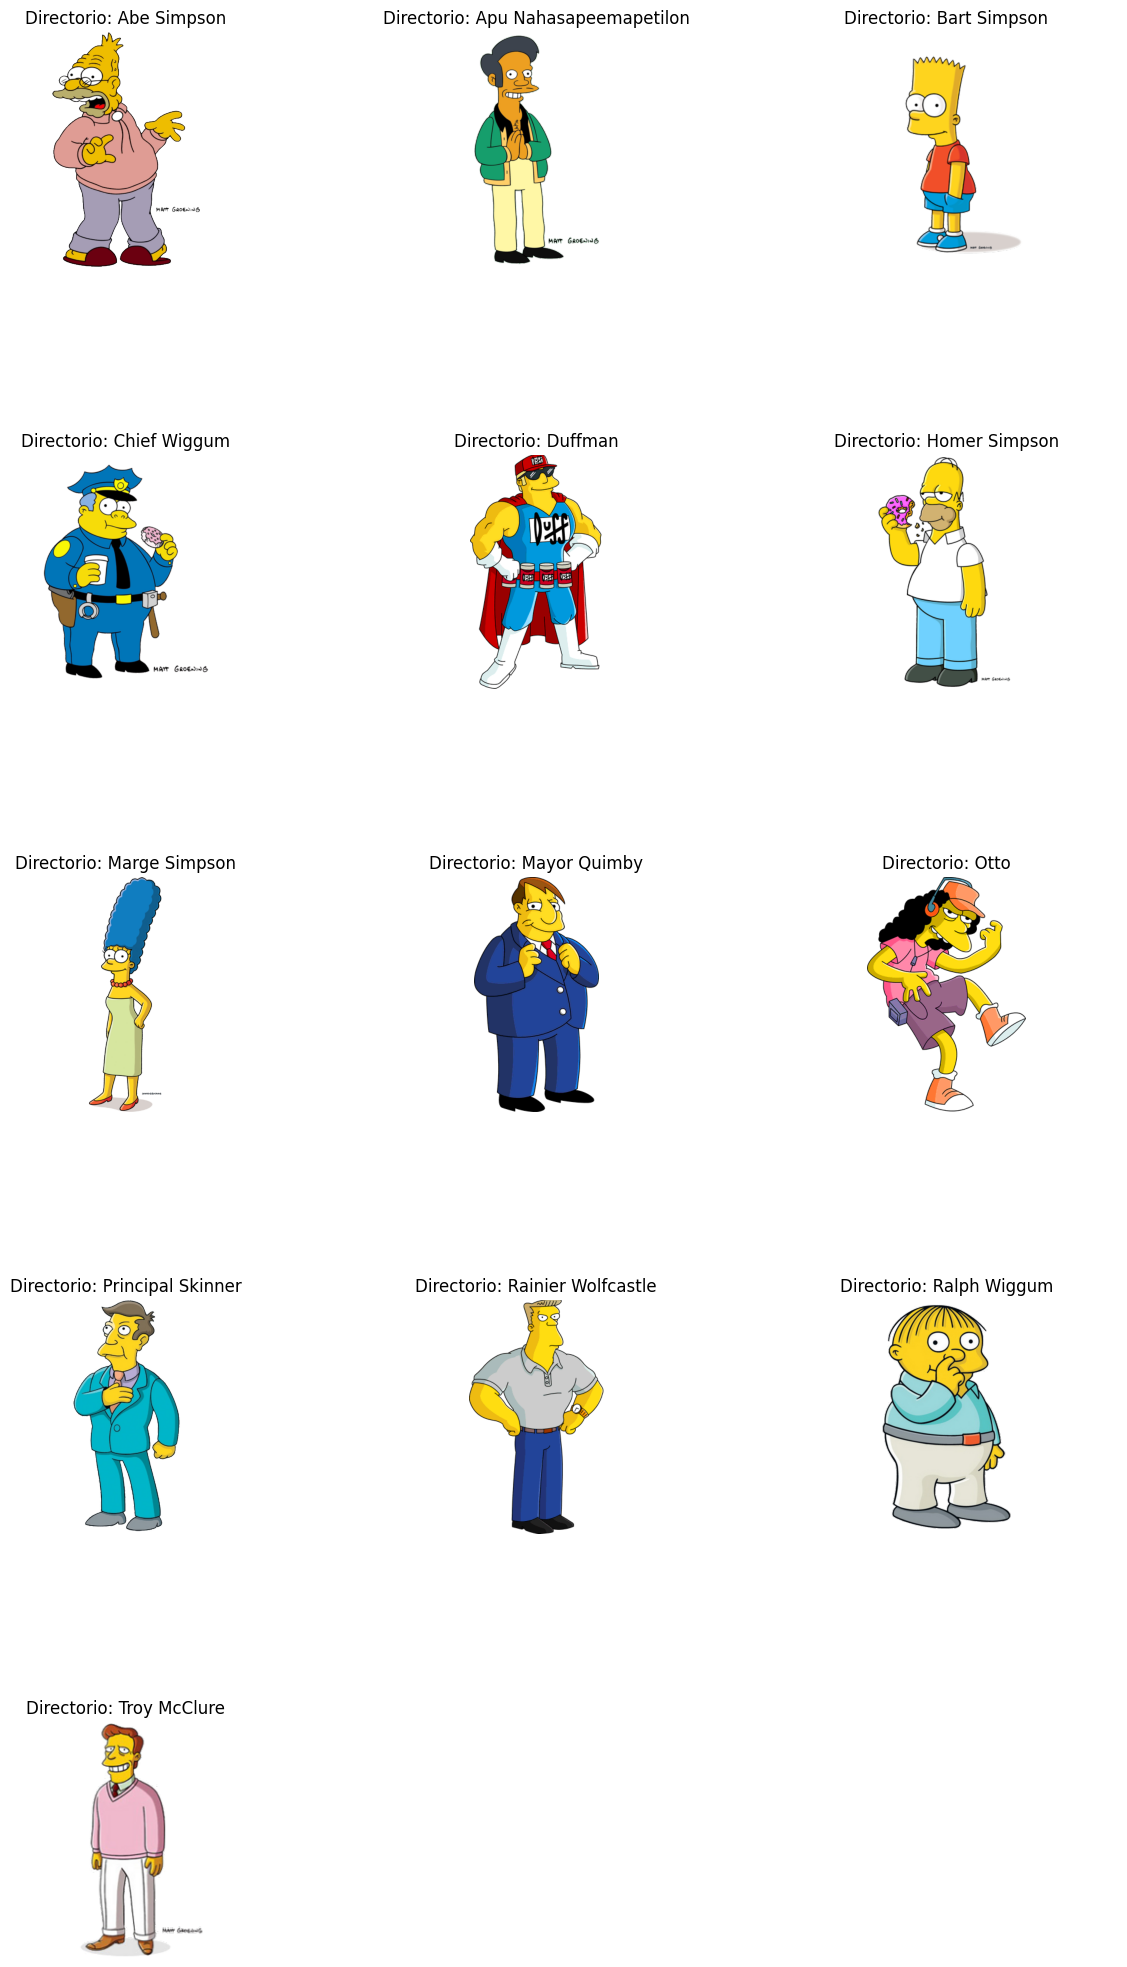

None

In [6]:
import os
import math
import imghdr
from matplotlib import pyplot as plt
from matplotlib import image as mpimg
from IPython import display
from tqdm import tqdm


#Imagenes a ver por columna
columnas = 3 
#Lista con la imagenes que hemso mostrado ya
imagenes = list() 

#Bucle para ir actualizando las gráficas
while True:
    
    # El try lo ponemos para cuando paremos la celda no salga ningún error
    try:
        if len(next(os.walk('./Personajes'))[1]) != 0 and len(imagenes) != len(next(os.walk('./Personajes'))[1]):
            filas = math.ceil(len(os.listdir(r'./Personajes'))/columnas)
            fig, ax  = plt.subplots(filas, columnas, sharex=False, sharey=False, figsize=(columnas*5, filas*5), squeeze=False)
            fig.subplots_adjust(hspace=0.8) 
            [axi.set_axis_off() for axi in ax.ravel()]
            
            # Inicializamos las columnas y las filas
            fil = 0
            col = 0     
        
            imagenes = next(os.walk('./Personajes'))[1]
            if len(imagenes) >= 15:
                imageBar = tqdm(imagenes)
            else:
                imageBar = imagenes
            
            for i in imageBar:
               
                while imghdr.what('./Personajes/'+i+'/'+i+'.png') != 'png' or os.path.exists('./Personajes/'+i+'/'+i+'.png') == False:
                    continue
                
                else:
                    imagen = mpimg.imread('./PErsonajes/'+i+'/'+i+'.png')
                    
                    ax[fil,col].use_sticky_edges = False
                    ax[fil,col].imshow(imagen)
                    ax[fil,col].set_title(f"Directorio: {i}")
                    
                    if (col + 1)  % columnas == 0:
                        col = 0
                        fil += 1
                    else:
                        col += 1
            
            display.display(plt.show())
            display.clear_output(wait=True)    
                
    
    
    # Exception to stop cell when stop button is pressed
    except KeyboardInterrupt:
        break     
